In [1]:
import json
from pathlib import Path
from girvan_decompose import loadCsv
import networkx as nx
import matplotlib.pyplot as plt
from netgraph import Graph, InteractiveGraph, EditableGraph
from tkinter.filedialog import askopenfilename, asksaveasfile

In [2]:
colorList = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan',
             'tab:olive', 'tab:purple', 'tab:gray', 'tab:brown', 'tab:pink']
shapeList = ['o', 'v', 's', 'p', 'd']

In [12]:

def drawFigure(group: list, csvPath: Path):
    _, G = loadCsv(csvPath)
    plt.clf()
    subG = G.subgraph(group)
    nodeColor={}
    commDict = {}
    shapeDict = {}
    for node in subG:
        if '_IO_' in node[:4]:
            nodeColor[node] = colorList[0]
            shapeDict[node] = shapeList[0]
            commDict[node] = 0
        elif '__libio_' in node[:10]:
            nodeColor[node] = colorList[1]
            shapeDict[node] = shapeList[1]
            commDict[node] = 1
        elif '__' in node[:2]:
            nodeColor[node] = colorList[2]
            shapeDict[node] = shapeList[2]
            commDict[node] = 2
        else:
            nodeColor[node] = colorList[3]
            shapeDict[node] = shapeList[3]
            commDict[node] = 3
    
    Graph(subG, node_color='tab:blue', node_edge_width=0, edge_alpha=0.1, node_layout='community', node_shape=shapeDict,
      node_layout_kwargs=dict(node_to_community=commDict), edge_layout='bundled', edge_layout_kwargs=dict(k=2000))
    plt.show()

def drawMultiFigure(groups: list, csvPath: Path):
    _, G = loadCsv(csvPath)
    plt.clf()
    commDict = {}
    shapeDict = {}
    nodeColor = {}
    i = 0
    for group in groups:
        for funcName in group:
            commDict[funcName] = i
#             shapeDict[funcName] = shapeList[i % len(shapeList)]
#             nodeColor[funcName] = colorList[i % len(colorList)]
        i += 1
    subG = G.subgraph(list(commDict.keys()))
    for node in subG:
        if '_IO_' in node[:4]:
            nodeColor[node] = colorList[0]
            shapeDict[node] = shapeList[0]
        elif '__libio_' in node[:10]:
            nodeColor[node] = colorList[1]
            shapeDict[node] = shapeList[1]
        elif '__' in node[:2]:
            nodeColor[node] = colorList[2]
            shapeDict[node] = shapeList[2]
        elif 'hydro' in node[:10]:
            nodeColor[node] = colorList[4]
            shapeDict[node] = shapeList[4]
        else:
            nodeColor[node] = colorList[3]
            shapeDict[node] = shapeList[3]
    Graph(subG, node_color='tab:purple', node_edge_width=0, edge_alpha=0.1, node_layout='community', node_shape='p',
      node_layout_kwargs=dict(node_to_community=commDict), edge_layout='bundled', edge_layout_kwargs=dict(k=2000))
    plt.show()

def drawLegend():
    fig, ax = plt.subplots()
    node_proxy_artists = [
        plt.Line2D([], [], linestyle='None', color='tab:blue', marker=shapeList[0], label='libio functions with name _IO_*'),
        plt.Line2D([], [], linestyle='None', color='tab:blue', marker=shapeList[1], label='libio functions with name __libio_*'),
        plt.Line2D([], [], linestyle='None', color='tab:blue', marker=shapeList[2], label='internal utility function'),
        plt.Line2D([], [], linestyle='None', color='tab:blue', marker=shapeList[3], label='other'),
    ]
    node_legend = ax.legend(handles=node_proxy_artists, loc='lower left', title='')
    ax.add_artist(node_legend)
    
    
#     plt.legend(colorDict, loc="upper right")
    plt.show()

In [4]:
csvName = askopenfilename()
csvPath = Path(csvName)

/home/yufei/.local/lib/python3.11/site-packages/netgraph/_node_layout.py:1620: UserWarning: There are no connections within community 1. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
/home/yufei/.local/lib/python3.11/site-packages/netgraph/_edge_layout.py:978: RuntimeWarning: invalid value encountered in divide
  displacement = compatibility * delta / distance_squared[..., None]


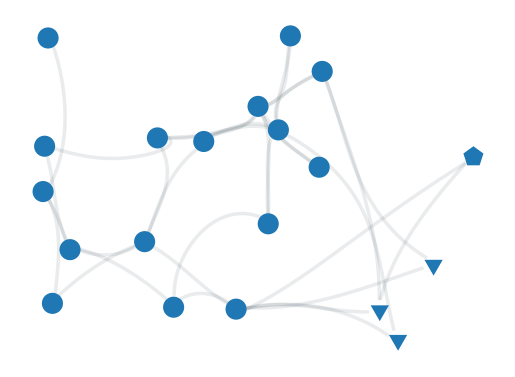

In [8]:
resultJson = askopenfilename()
with open(resultJson) as file:
    resultList = json.load(file)
drawFigure(resultList[35], csvPath)

/home/yufei/.local/lib/python3.11/site-packages/netgraph/_node_layout.py:1620: UserWarning: There are no connections within community 1. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
/home/yufei/.local/lib/python3.11/site-packages/netgraph/_edge_layout.py:978: RuntimeWarning: invalid value encountered in divide
  displacement = compatibility * delta / distance_squared[..., None]


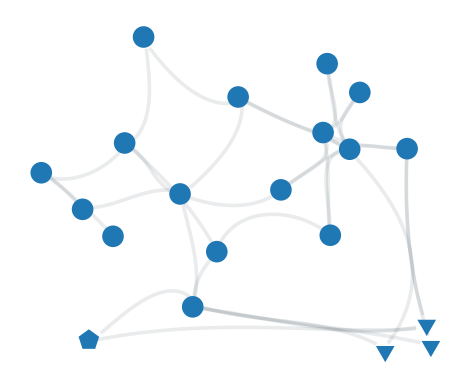

In [12]:
# Shortcut to redraw figure
drawFigure(resultList[35], csvPath)

In [28]:
resultLouvinJson = askopenfilename()
with open(resultLouvinJson) as file:
    resultLouvainList = json.load(file)

[['_IO_new_file_close_it', '_IO_new_fclose', '_IO_un_link'], ['_IO_wfile_sync', 'adjust_wide_data', '__libio_codecvt_encoding', '__libio_codecvt_length', '_IO_wfile_seekoff'], ['_IO_new_do_write', '_IO_wdo_write', '_IO_wfile_overflow', '_IO_new_file_overflow', '_IO_new_file_sync', '_IO_new_file_finish'], ['getifaddrs_internal', '__gconv_transform_utf8_internal', '__gconv_transform_internal_ucs4', '__chk_fail', 'find_derivation', '__wcsmbs_load_conv', '__gconv_transform_ascii_internal', 'context_reuse', 'find_module.constprop.0', '__btowc', '__gconv_transform_ucs2_internal', '__gconv_find_shlib', '__getifaddrs', '__gconv_transliterate', '__libc_dlsym', '__gconv_transform_internal_utf8', '__assert_fail', '__tsearch', '__twalk_r', 'create_thread', '__wcsrtombs', '__gconv_release_step', '__gconv_lookup_cache', '__gconv_transform_internal_ucs4le', '__gconv_transform_ucs4le_internal', '__gconv', '__gconv_get_builtin_trans', '__gconv_transform_internal_ucs2reverse', '__stack_chk_fail', '__str

/home/yufei/.local/lib/python3.11/site-packages/netgraph/_node_layout.py:1023: RuntimeWarning: invalid value encountered in divide
  directions = deltas / magnitudes[:, np.newaxis]
/home/yufei/.local/lib/python3.11/site-packages/netgraph/_edge_layout.py:978: RuntimeWarning: invalid value encountered in divide
  displacement = compatibility * delta / distance_squared[..., None]


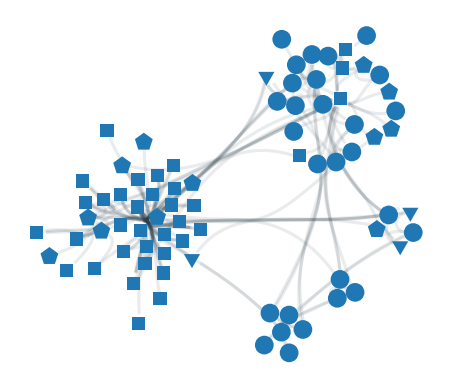

In [71]:
subsetList = []
for group in resultLouvainList:
    count = 0
    for funcName in resultList[35]:
        if funcName in group:
            count += 1
    if count > 0:
        subsetList.append(group)
print(subsetList)
drawMultiFigure(subsetList, csvPath)

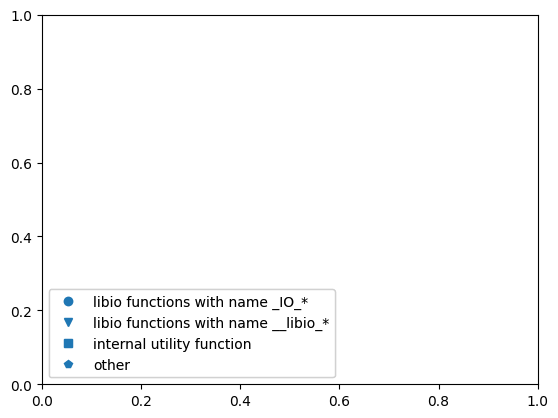

In [73]:
drawLegend()

/home/yufei/.local/lib/python3.11/site-packages/netgraph/_node_layout.py:1023: RuntimeWarning: invalid value encountered in divide
  directions = deltas / magnitudes[:, np.newaxis]
/home/yufei/.local/lib/python3.11/site-packages/netgraph/_edge_layout.py:978: RuntimeWarning: invalid value encountered in divide
  displacement = compatibility * delta / distance_squared[..., None]


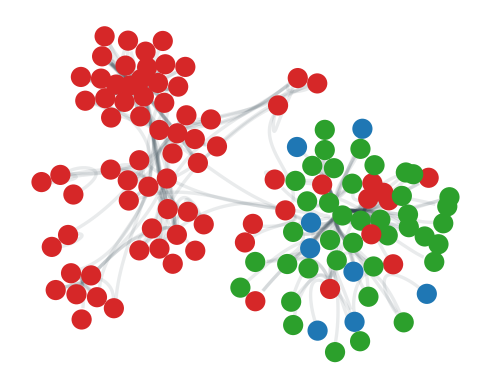

In [22]:
subsetList = []
for group in resultLouvainList:
    count = 0
    for funcName in group:
        if 'hydro' in funcName[:10]:
            count += 1
    if count > 1:
        subsetList.append(group)
drawMultiFigure(subsetList, csvPath)

/home/yufei/.local/lib/python3.11/site-packages/netgraph/_edge_layout.py:978: RuntimeWarning: invalid value encountered in divide
  displacement = compatibility * delta / distance_squared[..., None]


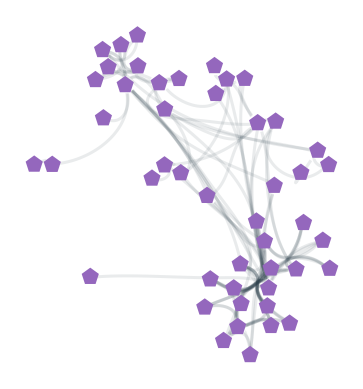

In [23]:
# resultSubgraphJson = askopenfilename()
with open(resultSubgraphJson) as file:
    resultSubgraphList = json.load(file)
drawMultiFigure(resultSubgraphList, csvPath)